# Import Libaries

In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape # 60000 images, 28x28 pixels

(60000, 28, 28)

# Flatten the images

In [4]:
X_train = X_train.reshape((60000,28,28,1)) # 1 is for grayscale
X_train = X_train.astype('float32')/255 # normalize value of color lies between 0 to 255 (0,1)

X_test = X_test.reshape((10000,28,28,1))
X_test = X_test.astype('float32')/255

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
X_train[0][0].ndim
y_train.ndim

2

# Build network

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1))) # 32 filters of 3x3 
model.add(layers.MaxPooling2D((2,2))) # 2x2 filter
model.add(layers.Conv2D(64,(3,3), activation='relu')) # 64 filters of 3x3
model.add(layers.MaxPooling2D((2,2)))# 2x2 filter
model.add(layers.Conv2D(64,(3,3), activation='relu'))# 64 filters of 3x3
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))# 64 neurons first layer
model.add(layers.Dense(10, activation= 'softmax'))# 10 neurons last layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

# Compile Network

In [7]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# Train Model

In [8]:
with tf.device('/gpu:0'):
    model.fit(X_train, y_train, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 15s 7ms/step - loss: 0.1695 - accuracy: 0.9460
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0458 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0319 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0236 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0192 - accuracy: 0.9942


# Evaluate the model

In [9]:
print(model.evaluate(X_test, y_test)[1])
#model.save('mnist_digit_classifier_model.h5')

313/313 [==============================] - 1s 4ms/step - loss: 0.0297 - accuracy: 0.9912
0.9911999702453613


In [10]:
#model.save('mnist_digit_classifier_model.h5')

(28, 28)before
(1, 28, 28)after
1/1 [==============================] - 0s 181ms/step
Predicted Class: 1


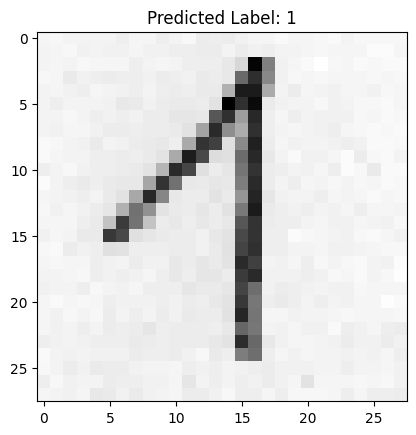

In [11]:
import cv2
model = keras.models.load_model('mnist_digit_classifier_model.h5')
def preprocess_input(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28,))
    img = img.astype('float32') / 255.0
    print(str(img.shape)+"before")
    img = np.expand_dims(img, axis=0)
    print(str(img.shape)+"after")
    return img

# Replace 'path_to_your_image.jpg' with the path to the image you want to predict
input_image_path = '1.jpg'
input_image = preprocess_input(input_image_path)

# Make a prediction using the trained model
predicted_class = np.argmax(model.predict(input_image))

# Display the input image and the predicted class
input_image_display = cv2.imread(input_image_path)
cv2.resize(input_image_display, (300, 300))
print("Predicted Class:", predicted_class)
plt.imshow(input_image[0], cmap='gray')
plt.title(f'Predicted Label: {predicted_class}')
plt.show()
